In [1]:
#biblioteca necesarias
#biblioteca de árbol de decisión
from sklearn import tree
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

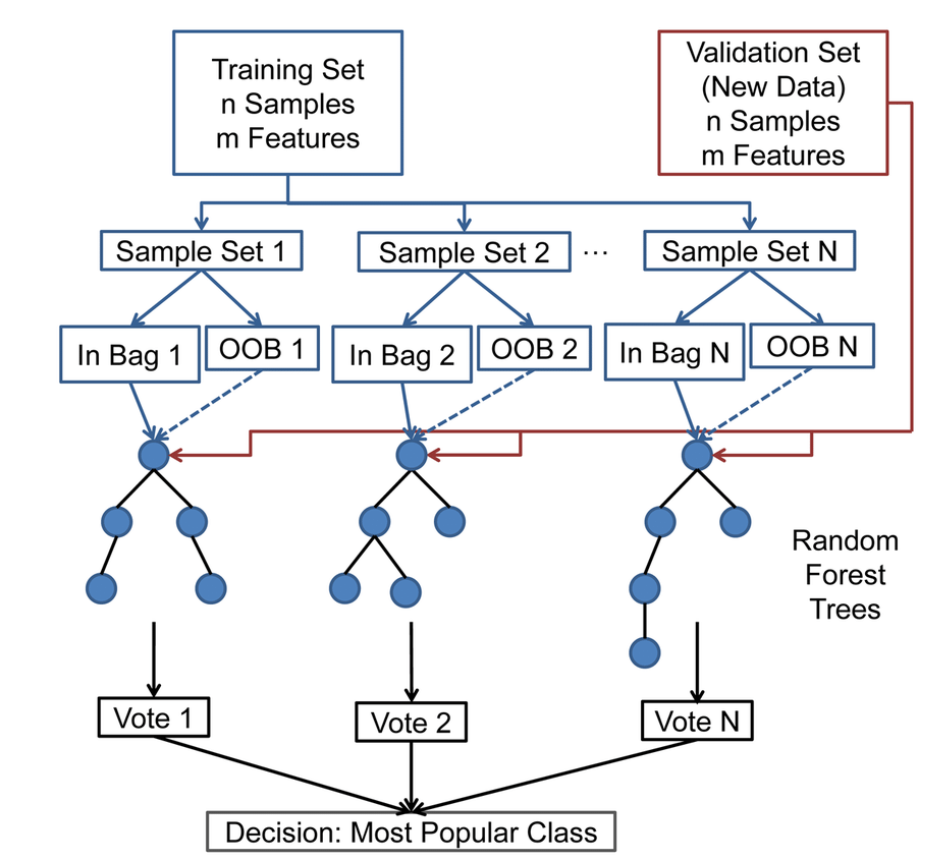

In [2]:
plantas=pd.read_csv("/content/plant_growth_data.csv")
plantas.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


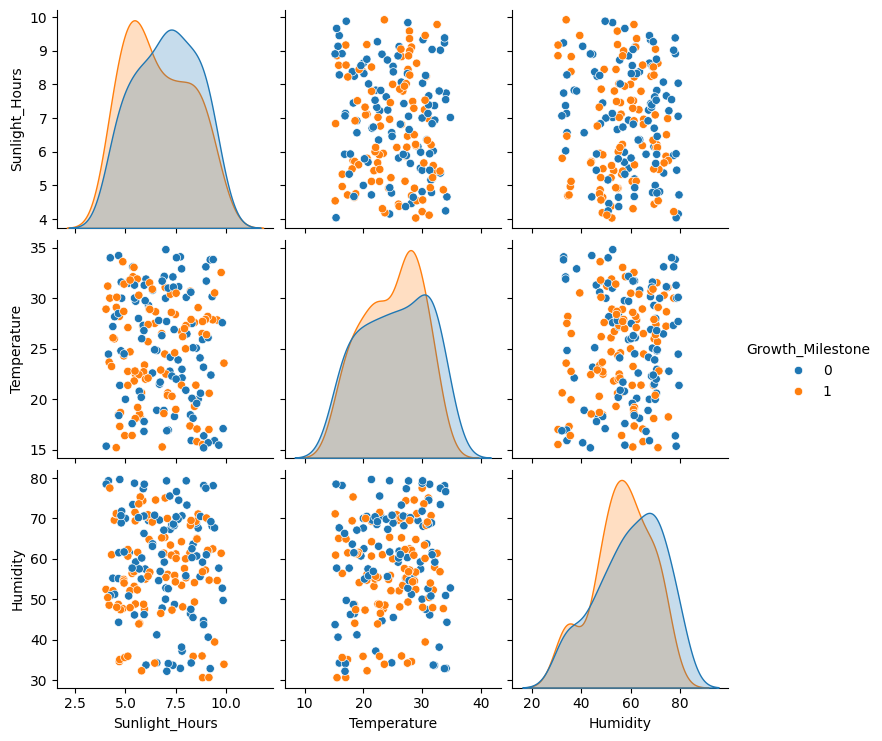

In [3]:
import seaborn as sns
sns.pairplot(plantas,hue="Growth_Milestone")

In [4]:
#extre las características
X=plantas[['Sunlight_Hours','Temperature','Humidity']]
y=plantas['Growth_Milestone']



In [10]:
#divide los datos en prueba y entrenamiento
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [11]:
#se llama al modelo de RandomFores
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=4, random_state=0)
#se acciona el modelo, se entrena el modelo
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [12]:
y_pred = classifier.predict(x_train)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1])

In [13]:
confusion_matrix(y_train, y_pred)

array([[62, 12],
       [ 9, 61]])

In [14]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        74
           1       0.84      0.87      0.85        70

    accuracy                           0.85       144
   macro avg       0.85      0.85      0.85       144
weighted avg       0.85      0.85      0.85       144



In [38]:
#predicción de datos de prueba
y_predTEst = classifier.predict(x_test)
y_predTEst

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [39]:
confusion_matrix(y_test, y_predTEst)

array([[12, 11],
       [ 9, 17]])

In [40]:
print(classification_report(y_test, y_predTEst))

              precision    recall  f1-score   support

           0       0.57      0.52      0.55        23
           1       0.61      0.65      0.63        26

    accuracy                           0.59        49
   macro avg       0.59      0.59      0.59        49
weighted avg       0.59      0.59      0.59        49



Escalando los datos

In [16]:
#escalado de los datos
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
#estoy escalando los datos de entrenamiento
x_train_scaler=preprocessing.StandardScaler().fit_transform(x_train)
x_train_scaler

array([[ 0.37143387, -0.54636209,  0.81134965],
       [-1.5848105 , -0.2804616 , -0.75961191],
       [-0.56936129,  0.1680956 ,  0.1583523 ],
       [ 1.52563231, -1.56676986, -2.16980166],
       [-0.50996251, -0.4648651 , -0.74297844],
       [-0.584364  , -0.9518651 , -0.25075447],
       [-1.41396439,  0.58786317, -0.54884379],
       [-0.52364309,  0.4224043 ,  1.50859573],
       [-0.04114075,  0.51566961, -0.28222422],
       [-1.46430434,  0.18491066, -0.48075704],
       [ 1.78430561,  0.5250127 , -0.27976524],
       [ 0.50270761, -0.60429109,  0.96083097],
       [-1.11883567, -0.12154941,  0.27636387],
       [ 0.37330921, -0.93255543, -0.85654719],
       [-1.54975683,  1.71310829, -0.57236339],
       [-0.09912242, -0.05738   , -1.88388622],
       [-0.66062779,  0.99841129,  1.21258898],
       [ 0.81827299,  0.95802657,  1.66186195],
       [-0.49954842, -1.60342473,  0.63716264],
       [ 1.35584227, -0.37661874, -1.06420518],
       [-1.00292698, -0.45688137, -1.755

In [17]:
#se realiza la predicción
classifier.fit(x_train_scaler, y_train)

y_pred_scaler = classifier.predict(x_train_scaler)
y_pred_scaler

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1])

In [18]:
confusion_matrix(y_train, y_pred_scaler)

array([[62, 12],
       [ 9, 61]])

In [19]:
print(classification_report(y_train, y_pred_scaler))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        74
           1       0.84      0.87      0.85        70

    accuracy                           0.85       144
   macro avg       0.85      0.85      0.85       144
weighted avg       0.85      0.85      0.85       144



In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled

array([[5.58577752e-01, 3.73216486e-01, 7.72672869e-01],
       [2.64323228e-02, 4.45601192e-01, 3.65501529e-01],
       [3.02658885e-01, 5.67709585e-01, 6.03425058e-01],
       [8.72547435e-01, 9.54361879e-02, 0.00000000e+00],
       [3.18816777e-01, 3.95401986e-01, 3.69812692e-01],
       [2.98577787e-01, 2.62828511e-01, 4.97390285e-01],
       [7.29065674e-02, 6.81980726e-01, 4.20129688e-01],
       [3.15095332e-01, 6.36938718e-01, 9.53389338e-01],
       [4.46347551e-01, 6.62327849e-01, 4.89233764e-01],
       [5.92128918e-02, 5.72287061e-01, 4.37776823e-01],
       [9.42912780e-01, 6.64871270e-01, 4.89871099e-01],
       [5.94287361e-01, 3.57446776e-01, 8.11416344e-01],
       [1.53188663e-01, 4.88861031e-01, 6.34012012e-01],
       [5.59087889e-01, 2.68085082e-01, 3.40377255e-01],
       [3.59677637e-02, 9.88300350e-01, 4.14033736e-01],
       [4.30575145e-01, 5.06329534e-01, 7.41052962e-02],
       [2.77832204e-01, 7.93742105e-01, 8.76668512e-01],
       [6.80128719e-01, 7.82748

In [21]:
#se entrena
classifier.fit(x_train_scaler, y_train)
#se realiza la predicción
y_pred_scaler = classifier.predict(x_train_scaler)
y_pred_scaler

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1])

In [22]:
confusion_matrix(y_train, y_pred_scaler)

array([[62, 12],
       [ 9, 61]])

In [23]:
print(classification_report(y_train, y_pred_scaler))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        74
           1       0.84      0.87      0.85        70

    accuracy                           0.85       144
   macro avg       0.85      0.85      0.85       144
weighted avg       0.85      0.85      0.85       144



In [24]:
plantas=pd.read_csv("/content/plant_growth_data.csv")
plantas.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [25]:
plantas['Soil_Type'].value_counts()

,count
Soil_Type,
clay,67
sandy,64
loam,62


In [26]:
plantas['Water_Frequency'].value_counts()

,count
Water_Frequency,
daily,74
bi-weekly,60
weekly,59


In [27]:
plantas['Fertilizer_Type'].value_counts()


,count
Fertilizer_Type,
none,74
chemical,65
organic,54


In [28]:
#se pasa de variables categóticas a variables numéricas
plantas=plantas.replace({"clay": 1, "sandy": 2,"loam":3},)
plantas=plantas.replace({"daily": 1, "bi-weekly": 2,"weekly":3})
plantas=plantas.replace({"none": 1, "chemical": 2,"organic":3})
plantas

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,3,5.192294,2,2,31.719602,61.591861,0
1,2,4.033133,3,3,28.919484,52.422276,1
2,3,8.892769,2,1,23.179059,44.660539,0
3,3,8.241144,2,1,18.465886,46.433227,0
4,2,8.374043,2,3,18.128741,63.625923,0
...,...,...,...,...,...,...,...
188,2,5.652000,1,1,28.000000,70.200000,0
189,1,7.528000,3,2,30.500000,60.100000,1
190,3,4.934000,2,1,24.500000,61.700000,0
191,2,8.273000,1,3,27.900000,69.500000,1


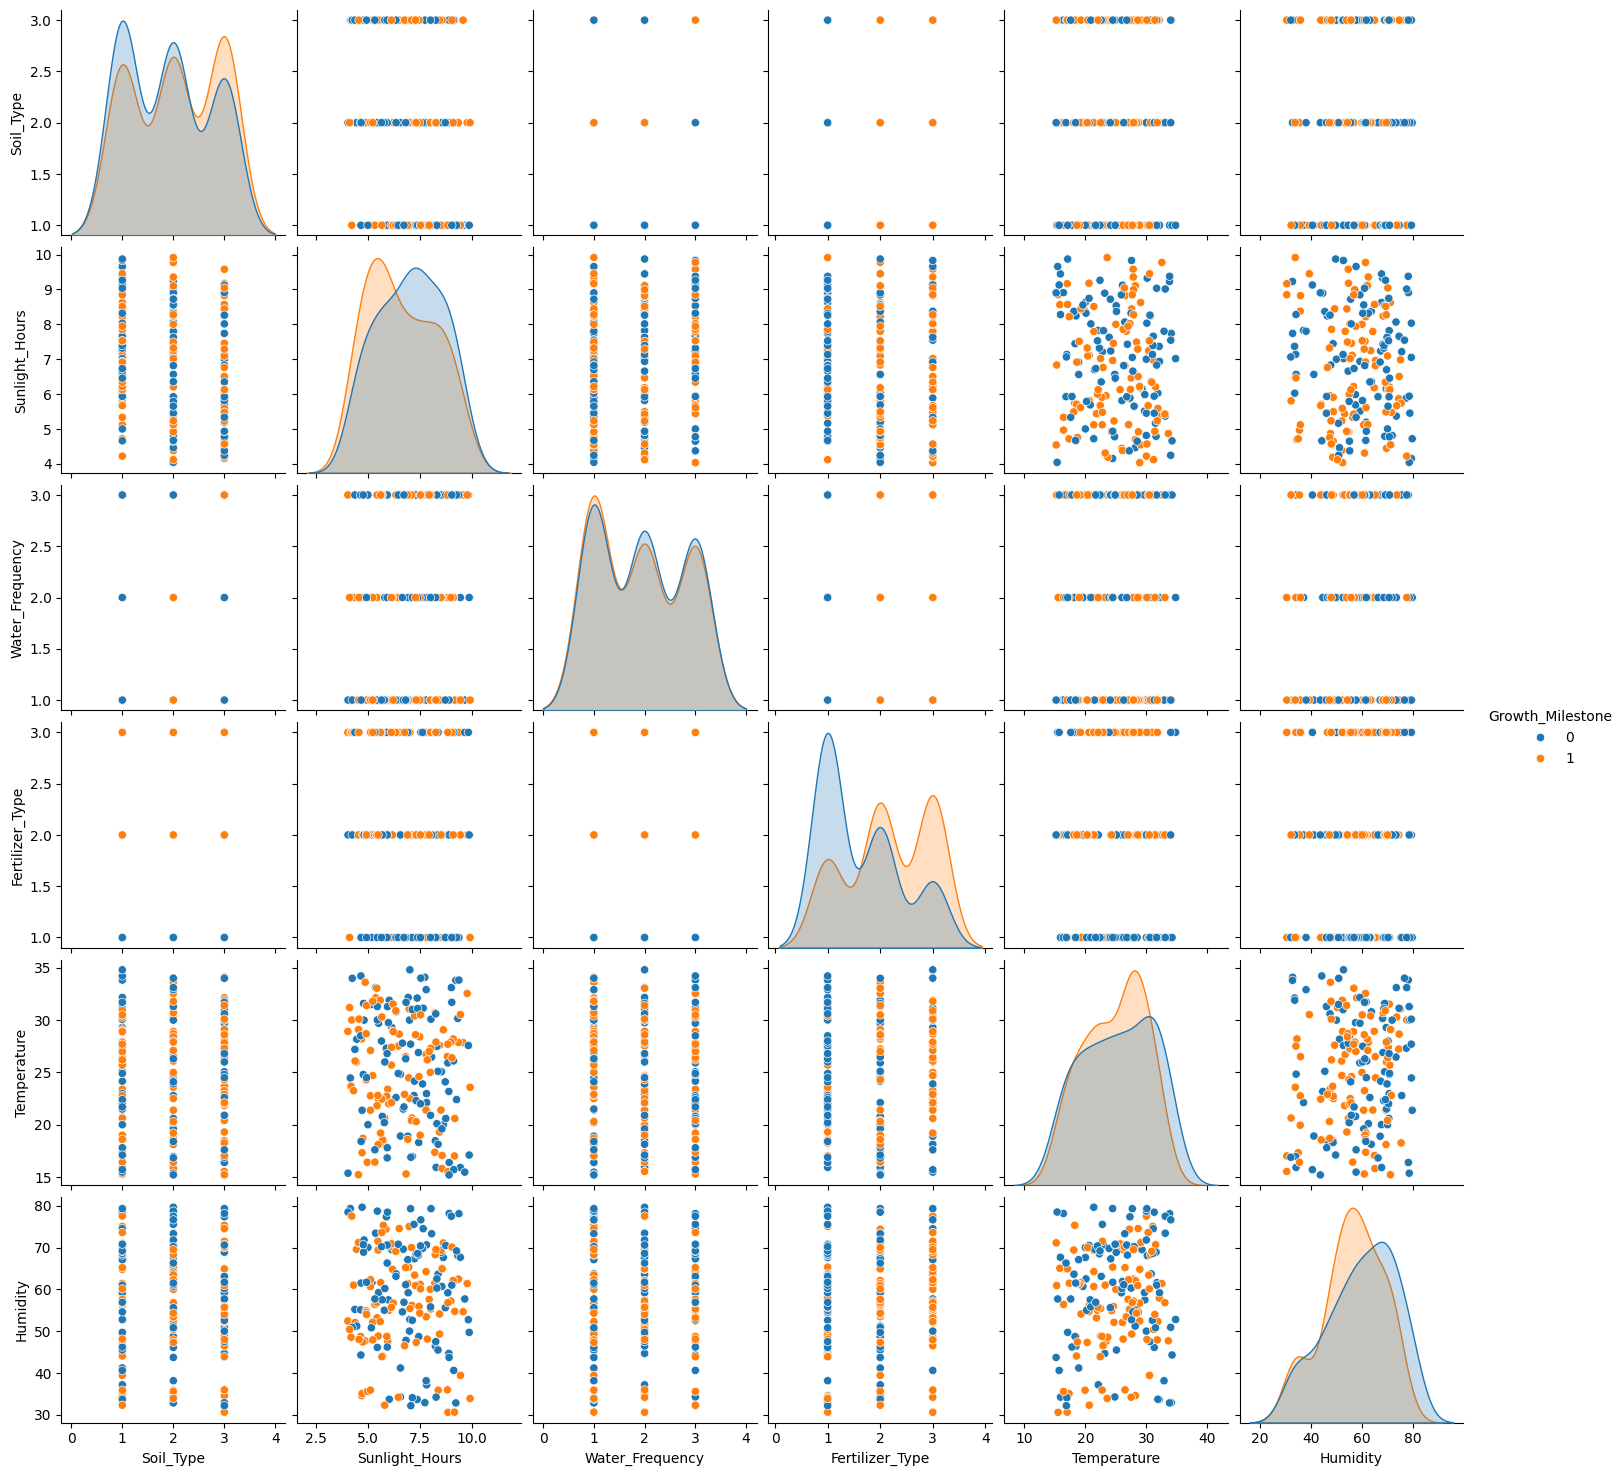

In [29]:
import seaborn as sns
sns.pairplot(plantas,hue="Growth_Milestone")

In [31]:
#Soil_Type	Sunlight_Hours	Water_Frequency	Fertilizer_Type	Temperature	Humidity	Growth_Milestone
#X=plantas[['Soil_Type']]
#X=plantas[['Water_Frequency']]
#X=plantas[['Fertilizer_Type']]
X=plantas[['Soil_Type','Water_Frequency','Fertilizer_Type']]

y=plantas['Growth_Milestone']
# Extract features and target variable from the DataFrame

In [32]:
plantas.corr()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
Soil_Type,1.000000,-0.222516,-0.133406,0.019482,-0.026519,-0.069916,0.094949
Sunlight_Hours,-0.222516,1.000000,0.156982,-0.060622,-0.100628,-0.052482,-0.122212
Water_Frequency,-0.133406,0.156982,1.000000,-0.035347,-0.087258,0.047026,-0.019295
Fertilizer_Type,0.019482,-0.060622,-0.035347,1.000000,-0.013099,0.042468,0.332892
Temperature,-0.026519,-0.100628,-0.087258,-0.013099,1.000000,0.117648,-0.053577
Humidity,-0.069916,-0.052482,0.047026,0.042468,0.117648,1.000000,-0.130328
Growth_Milestone,0.094949,-0.122212,-0.019295,0.332892,-0.053577,-0.130328,1.000000


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [34]:
#*****************************
#se utilza Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=4, random_state=0)
#se acciona el modelo
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [35]:
y_pred = classifier.predict(x_train)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [36]:
confusion_matrix(y_train, y_pred)

array([[58, 16],
       [24, 46]])

In [37]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74        74
           1       0.74      0.66      0.70        70

    accuracy                           0.72       144
   macro avg       0.72      0.72      0.72       144
weighted avg       0.72      0.72      0.72       144



In [41]:
#se realiza la predicción con los datos de prueba
y_predTest = classifier.predict(x_test)
y_predTest

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [42]:
confusion_matrix(y_test, y_predTest)

array([[12, 11],
       [ 9, 17]])

In [43]:
print(classification_report(y_test, y_predTest))

              precision    recall  f1-score   support

           0       0.57      0.52      0.55        23
           1       0.61      0.65      0.63        26

    accuracy                           0.59        49
   macro avg       0.59      0.59      0.59        49
weighted avg       0.59      0.59      0.59        49

